# Spatial Navigation Data Pipeline
Author: Gabriel Bonassi  
Adapted from the works of Federico Claudi and Alexander Mathis. 


In [1]:
# Use this cell to install pip dependencies as needed


Please make sure to have your video and DLCscorer file in the same folder of this notebook. Your DLCscorer file can be found in the evaluation-results of your DLC project post evaluation of a view using DLC (with the option to plot to .CSV selected)

In [2]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Make sure files are in the Jupyter Folder
video='m3v1mp4.mp4'
DLCscorer='DeepCut_resnet50_openfieldOct30shuffle1_15001'

dataname = str(Path(video).stem) + DLCscorer + '.h5'

#loading output of DLC
Dataframe = pd.read_hdf(os.path.join(dataname))

# Body Part Position Probability   

In [4]:
#Let's have a look at the data:

#these structures are awesome to manipulate, how -->> see pandas https://pandas.pydata.org/pandas-docs/stable/index.html
Dataframe.head()

scorer    DeepCut_resnet50_openfieldOct30shuffle1_15001                        \
bodyparts                                         snout                         
coords                                                x          y likelihood   
0                                             75.861072  88.507002   0.998635   
1                                             74.647148  86.439178   0.999414   
2                                             73.194103  84.019596   0.998932   
3                                             73.438760  80.511157   0.997915   
4                                             72.886618  78.118725   0.998793   

scorer                                                                        \
bodyparts    leftear                          rightear                         
coords             x           y likelihood          x          y likelihood   
0          72.025992  102.749917   0.999638  85.855313  90.199704   0.999799   
1          70.350068   99.621388   0.999836  85.889819  87.061889   0.999841   
2          70.259041   97.208403   0.999711  84.494195  84.364351   0.999868   
3          69.019256   94.777282   0.999723  83.491114  81.967655   0.999787   
4          68.076695   91.436165   0.999839  81.375813  78.291511   0.999795   

scorer                                        
bodyparts    tailbase                         
coords              x           y likelihood  
0          142.480108  180.372046   0.999833  
1          141.605256  179.365415   0.999991  
2          144.028973  175.509624   0.999990  
3          147.907935  174.848115   0.999971  
4          150.296287  170.733274   0.999970

In [5]:
# The plotting functions below are put here for simplicity and so that the user can edit them. Note that they 
# (or variants thereof) are in fact in standard DLC and accessible via:

import deeplabcut
deeplabcut.utils.plotting.PlottingResults?

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


# Post Analysis Plots

In [6]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

   

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)
    plt.title('Consecutive Coordinate Differences', y=1.0, pad=35, fontsize=20)
    plt.suptitle('(low values = minimal jumps across frames)', fontsize=12, x=0.45, y =0.97)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!
    plt.title('Body Parts Plotted in Space', y=1.0, pad=35, fontsize=20)
    plt.suptitle('(over all frames)', fontsize=12, x=0.45, y =0.97)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))
    plt.title('All Body Parts Across Time (Frames)', y=1.0, pad=35, fontsize=20)
    plt.suptitle('(solid lines are x and dashed lines are y)', fontsize=12, x=0.45, y =0.97)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    
    
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')
    plt.title('Body Part Likelihood Over Time', y=1.0, pad=35, fontsize=20)
    plt.suptitle('(over all frames)', fontsize=12, x=0.45, y =0.97)
    

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)
    

    
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

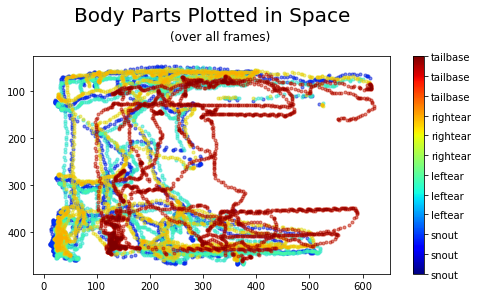

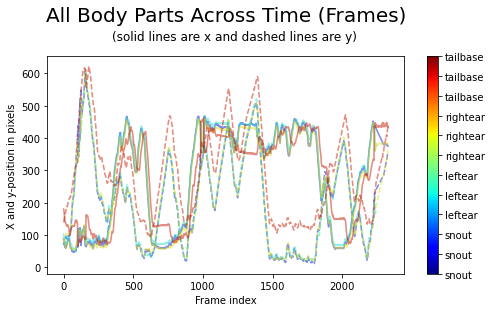

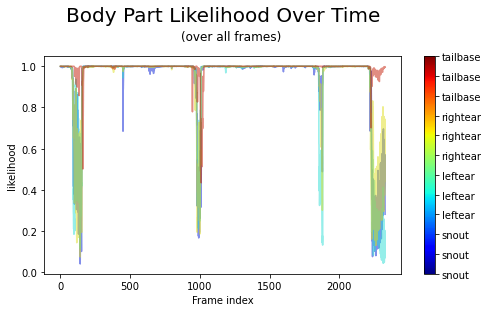

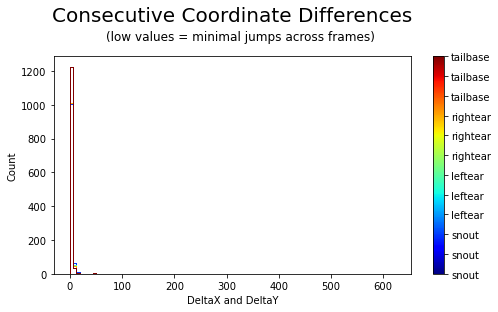

In [7]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

# These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]


# Intensity of Movement (Velocity) vs. Time

In [8]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

#let's chose a body part and calculate its velocity in pixels per second
bpt='snout'
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe[DLCscorer][bpt]['x'].values.flatten(), Dataframe[DLCscorer][bpt]['y'].values.flatten()]).T)

fps=24 # frame rate of camera in the experiment
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xbpt=Dataframe[DLCscorer][bpt]['x'].values
ybpt=Dataframe[DLCscorer][bpt]['y'].values
vbpt=vel



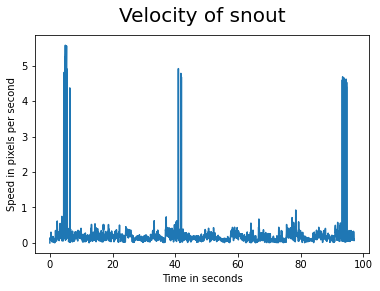

In [9]:
%matplotlib inline

plt.plot(time,vel*1./fps)
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.title('Velocity of {}'.format(bpt), y=0.9, pad=35, fontsize=20)

plt.show()


# Region of Interest Analysis (ROI)

In [10]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xbpt, ybpt, vbpt))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((0, 0), (300, 480)),'rightside': position((300, 0), (640, 480))} 
print(rois)

{'leftside': position(topleft=(0, 0), bottomright=(300, 480)), 'rightside': position(topleft=(300, 0), bottomright=(640, 480))}


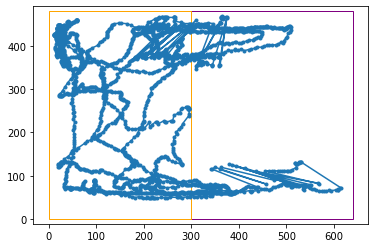

In [11]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(xbpt,ybpt,'.-')

rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
plt.ylim(-11,491)
plt.show()



# Time Spent in Region of Interest (ROI)

In [12]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

check_inroi = True
res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=30)

#print results:
res

{'transitions_per_roi': {'leftside': 10, 'rightside': 10, 'tot': 20},
 'cumulative_time_in_roi': {'leftside': 1768, 'rightside': 562, 'tot': 2330},
 'cumulative_time_in_roi_sec': {'leftside': 58.93333333333333,
  'rightside': 18.733333333333334,
  'tot': 77.66666666666666},
 'avg_time_in_roi': {'leftside': 176.8, 'rightside': 56.2, 'tot': 233.0},
 'avg_time_in_roi_sec': {'leftside': 5.8933333333333335,
  'rightside': 1.8733333333333335,
  'tot': 7.7666666666666675},
 'avg_vel_in_roi': {'leftside': 4.798367612314975,
  'rightside': 7.978920763420923,
  'tot': 12.7772883757359}}

# Get Labeled Videos 



This will not run in Jupyter, simply install DLC in anaconda and execute the following code in the anaconda environment to get your labelled trajectory video. Simply change the path for config.yaml and video. 

In [13]:

#  deeplabcut.create_labeled_video(r'C:\Users\gabri\Downloads\NoseX\NoseF-T-2021-04-17\config.yaml',[r'C:\Users\gabri\Downloads\NoseX\NoseF-T-2021-04-17\videoss\Mouse Training.avi'], videotype='.avi')


# Clean Bodypart Dataset (removes periods of time where movement intensity is above velocity threshold)

In [14]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([Dataframe[DLCscorer][bpt]['x'].values.flatten(), Dataframe[DLCscorer][bpt]['y'].values.flatten()]).T)

fps=24 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xbpt=Dataframe[DLCscorer][bpt]['x'].values
ybpt=Dataframe[DLCscorer][bpt]['y'].values
vbpt=vel


In [15]:
import csv 


#exports an unmodified csv dataset to Jupyter Notebook Files

x_coord = xbpt
y_coord = ybpt
velo = vbpt*1./fps
timee = time
coord_count = 0


with open('uncleandataset.csv', 'w', newline='') as csvfile:
    
    fieldnames = ['X-Coordinate', 'Y-Coordinate', 'Velocity (pixels_per_second)', 'Time']
    
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    thewriter.writeheader()
    
    for i in x_coord:
        thewriter.writerow({'X-Coordinate':x_coord[coord_count], 'Y-Coordinate':y_coord[coord_count], 'Velocity (pixels_per_second)':velo[coord_count],
                           'Time': timee[coord_count]})
        coord_count += 1
        
with open('uncleandataset.csv') as csvfile:
    
    data = [row for row in csv.reader(csvfile)]
    
    dataset_tobecleaned = pd.DataFrame(data = data)
    
    new_header = dataset_tobecleaned.iloc[0] #grab the first row for the header
    dataset_tobecleaned = dataset_tobecleaned[1:] #take the data less the header row
    dataset_tobecleaned.columns = new_header #set the header row as the df header
        
      



In [16]:
import csv 
import pandas as pd 
                            #Drops timestamps where velocity exceeds threshold 

#set velocity (pixel per second) threshold here
        
velocity_threshold = 4.5

#do not touch counts or for loops will freak out

count = 1
coord_count = 1
x_coord = dataset_tobecleaned["X-Coordinate"]
y_coord = dataset_tobecleaned["Y-Coordinate"]
velo2 = dataset_tobecleaned["Velocity (pixels_per_second)"]
timee = dataset_tobecleaned["Time"]

with open('cleandataset.csv', 'w', newline='') as csvfile:
    
    fieldnames = ['X-Coordinate', 'Y-Coordinate', 'Velocity (pixels_per_second)', 'Time']
    
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    thewriter.writeheader()
    
    for i in x_coord:
        thewriter.writerow({'X-Coordinate':x_coord[coord_count], 'Y-Coordinate':y_coord[coord_count], 'Velocity (pixels_per_second)':velo2[coord_count],
                           'Time': timee[coord_count]})
        coord_count += 1
    
    for i in x_coord:
        if float(velo2[count]) > velocity_threshold:
            dataset_tobecleaned = dataset_tobecleaned.drop([count], axis=0)   
        count += 1
             
count = 0      





# Export Cleaned Dataset to .csv file

In [17]:

#x_coord2 = dataset_tobecleaned['X-Coordinate'].reset_index(drop=True)
coord_count1 = 0
x_coord2 = dataset_tobecleaned["X-Coordinate"].reset_index(drop=True)
y_coord2 = dataset_tobecleaned["Y-Coordinate"].reset_index(drop=True)
velo3 = dataset_tobecleaned["Velocity (pixels_per_second)"].reset_index(drop=True)
timee2 = dataset_tobecleaned["Time"].reset_index(drop=True)
datalength = len(velo3) 


with open('cleandataset.csv', 'w', newline='') as csvfile:
    
    fieldnames = ['X-Coordinate', 'Y-Coordinate', 'Velocity (pixels_per_second)', 'Time']
    
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    thewriter.writeheader()
    
    for i in range(0, datalength):
        thewriter.writerow({'X-Coordinate':x_coord2[coord_count1], 'Y-Coordinate':y_coord2[coord_count1], 'Velocity (pixels_per_second)':velo3[coord_count1],'Time': timee2[coord_count1]})
        coord_count1 += 1
    
coord_count1 = 1
        
        

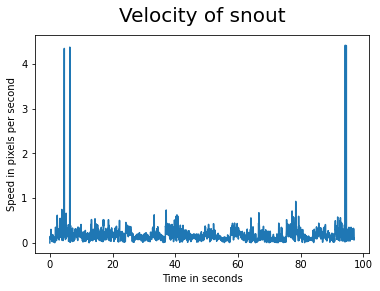

In [18]:
%matplotlib inline

timee3 = dataset_tobecleaned["Time"].tolist()
for i in range(0, len(timee3)):
    timee3[i] = float(timee3[i])

velo4 = dataset_tobecleaned["Velocity (pixels_per_second)"].to_list()
for i in range(0, len(velo4)):
    velo4[i] = float(velo4[i])

plt.plot(timee3,velo4)
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.title('Velocity of {}'.format(bpt), y=0.9, pad=35, fontsize=20)

plt.show()

In [22]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

pandas==1.1.3
numpy==1.19.2
matplotlib==3.3.2
deeplabcut==2.2.0.3


In [23]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'pandas',
 'numpy',
 'os',
 'matplotlib.pyplot',
 'deeplabcut',
 'time_in_each_roi',
 'matplotlib.patches',
 'csv',
 'types',
 'pip',
 'pkg_resources']